In [2]:
%matplotlib inline
import numpy as np
import matplotlib.tri as Tri
from netCDF4 import Dataset as NetCDFFile 
import netCDF4
from netCDF4 import num2date, date2num, date2index
import datetime as dt
import pandas as pd
from StringIO import StringIO
import xarray as xr
from scipy import stats
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature

/Users/bgh2-ra/anaconda2/lib/python2.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/Users/bgh2-ra/anaconda2/lib/python2.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [3]:
nameCSV = 'melville_ACTUAL_FILEEE.csv'
df = pd.read_csv(str(nameCSV), sep=r'\s+', engine='c', header=0, na_filter=False, \
                               dtype=np.float, low_memory=False)

data = df.sort_values(by=['tt'])

lat = data.values[:,0]
lon = data.values[:,1]
wh = data.values[:,2]
tt = data.values[:,3]
qc = data.values[:,4]
back =data.values[:,5]
ws = data.values[:,6]

## Calculate mean value of each satellite track 

In [4]:
days = [] #daystart
for k in range(len(tt)):
       
    t1 = netCDF4.num2date(tt[k],u'days since 1985-01-01 00:00:00 UTC')
    if k == 0: #get day 0. Then else: every day after that
        days.append(0)
        dd = netCDF4.num2date(tt[k],u'days since 1985-01-01 00:00:00 UTC')
        it = 0
    else:
        if t1.day != dd.day: #if day 1 is not equal to day 2, then append
            #print dd.day,t1.day
            days.append(k)
            it += 1
            dd = netCDF4.num2date(tt[k],u'days since 1985-01-01 00:00:00 UTC')
            
            
print 'Number of Satellite Tracks:', len(tt[days])

Number of Satellite Tracks: 2639


In [5]:
for k in range(len(days)):
    print wh[days[k]], netCDF4.num2date(tt[days[k]],u'days since 1985-01-01 00:00:00 UTC')

1.3633999824523926 1985-04-05 21:27:30.469790
1.3511250019073486 1985-04-14 09:26:31.513184
1.34530770778656 1985-05-07 11:06:14.088943
2.0326924324035645 1985-05-30 12:45:54.566106
1.6260000467300415 1985-06-02 12:54:42.804684
0.9227856993675232 1985-06-25 14:34:14.719868
1.345666766166687 1985-08-10 17:53:29.313367
2.313499927520752 1985-09-02 19:32:58.781247
2.4012999534606934 1985-09-05 19:41:45.054690
1.3407059907913208 1985-09-28 21:21:12.227023
0.32442858815193176 1985-10-16 11:10:26.379465
1.9190832376480105 1985-11-08 12:49:40.654948
1.4140626192092896 1985-11-14 00:39:52.969910
1.2756000757217407 1985-12-07 02:18:58.426560
0.5147500038146973 1986-01-19 17:56:10.249999
0.3118000030517578 1986-02-11 19:35:15.709374
0.5635000467300415 1986-03-12 09:03:50.362630
2.66937518119812 1986-04-04 10:42:45.532226
1.7990001440048218 1986-04-07 10:51:29.847656
0.3752500414848328 1986-04-27 12:21:35.900392
1.867833495140076 1986-04-30 12:30:16.296876
2.049000024795532 1986-05-20 14:00:18.82

1.5534445444742842 2001-10-01 23:40:44.843751
0.8941250443458557 2001-10-04 00:39:50.112168
0.905090938914906 2001-10-06 11:34:39.187500
1.1083848476409912 2001-10-09 06:11:59.064903
1.7408890194363065 2001-10-11 21:39:16.680554
0.7464706301689148 2001-10-14 17:59:02.363972
0.8377272865988992 2001-10-16 09:33:10.842329
0.3365000188350677 2001-10-20 00:36:51.578371
1.4364446004231768 2001-10-21 19:37:48.126736
1.3867502212524414 2001-10-26 07:31:42.172526
0.9092222849527994 2001-10-31 17:36:19.456598
0.921117663383484 2001-11-02 12:54:59.884191
2.40036357532848 2001-11-05 05:30:13.316050
1.5628750324249268 2001-11-08 00:39:26.266266
1.2196667989095051 2001-11-11 18:33:17.832032
0.7297692894935608 2001-11-12 08:37:46.218750
2.373666763305664 2001-11-15 03:28:46.294706
1.8541665077209477 2001-11-17 20:24:49.484375
0.6514444351196289 2001-11-20 13:33:21.819443
1.3771429061889648 2001-11-24 00:36:24.228655
1.6142728978937322 2001-11-25 01:27:15.224697
0.7158000469207764 2001-11-29 09:50:34.

2.56933331489563 2010-10-01 12:26:23.840624
1.7206667264302569 2010-10-05 11:19:29.765623
1.772000206841363 2010-10-06 23:31:41.185765
2.0741333961486816 2010-10-07 00:10:54.609798
1.771833419799805 2010-10-09 11:14:29.865017
1.5531667073567708 2010-10-11 11:25:34.242187
1.616705950568704 2010-10-14 22:50:17.422795
1.528777864244249 2010-10-16 21:30:12.125000
1.9892501831054688 2010-10-21 09:24:05.096355
1.720666673448351 2010-10-26 19:28:43.015626
1.2917501131693525 2010-10-31 07:22:36.306639
1.5105000734329224 2010-11-03 00:11:42.690003
1.9496471180635342 2010-11-05 09:51:51.167739
1.7621251344680786 2010-11-06 12:26:09.120606
1.861249923706055 2010-11-07 09:49:22.237631
0.9426666895548502 2010-11-10 05:21:07.286784
1.1080910075794568 2010-11-12 21:25:12.460227
0.8406428694725037 2010-11-14 00:08:46.865243
0.9535556369357638 2010-11-15 15:25:46.060762
1.0525832970937092 2010-11-20 03:19:39.795248
1.787777794731988 2010-11-25 13:24:18.137153
0.9073333740234376 2010-11-30 01:18:12.3816

1.4982501665751142 2016-08-02 10:10:13.589194
1.2697060528923485 2016-08-03 01:54:50.558077
2.3157778845893007 2016-08-07 20:14:51.578125
2.265636444091797 2016-08-08 06:04:46.092328
2.1380000394933365 2016-08-10 13:28:14.724266
2.1245001157124843 2016-08-12 08:08:44.636719
3.1516002655029296 2016-08-17 18:13:22.306250
2.408588171005249 2016-08-19 00:10:10
1.070750077565511 2016-08-22 06:07:16.164063
2.451000001695421 2016-08-27 16:11:53.706596
2.4926668802897134 2016-08-28 00:34:44.017958
2.4828889634874134 2016-08-30 00:32:17.817885
1.9010001420974727 2016-09-01 00:29:44.079591
2.2798334757486978 2016-09-04 12:08:08.560330
2.7920000553131104 2016-09-06 12:05:33.460935
2.332999958711512 2016-09-08 12:03:14.922795
1.7052499453226726 2016-09-11 02:04:19.215657
1.997588396072388 2016-09-15 00:10:13
1.9655000686645507 2016-09-16 12:08:57.321876
1.3020000457763672 2016-09-21 00:02:51.645000
0.6985000371932983 2016-09-25 23:09:43.390625
0.9417778650919596 2016-09-26 10:07:29.598091
1.652176

## Make list for each month

In [6]:
#wave height
janwh = []
febwh = []
marwh = []
aprwh = []
maywh = []
junwh = []
julwh = []
augwh = []
sepwh = []
octwh = []
novwh = []
decwh = []


#time
jantime = []
febtime = []
martime = []
aprtime = []
maytime = []
juntime = []
jultime = []
augtime = []
septime = []
octtime = []
novtime = []
dectime = []


#wind speed
janws = []
febws = []
marws = []
aprws = []
mayws = []
junws = []
julws = []
augws = []
sepws = []
octws = []
novws = []
decws = []


#backscatter
janbs = []
febbs = []
marbs = []
aprbs = []
maybs = []
junbs = []
julbs = []
augbs = []
sepbs = []
octbs = []
novbs = []
decbs = []

In [7]:
for k in range(len(days)-1):
    dt = netCDF4.num2date(tt[days[k]],u'days since 1985-01-01 00:00:00 UTC')
    
    if dt.month == 1:
        janwh.append(np.mean(wh[days[k]:days[k+1]]))
        jantime.append(tt[days[k]])
        janws.append(np.mean(ws[days[k]:days[k+1]]))
        janbs.append(np.mean(back[days[k]:days[k+1]]))
        
    if dt.month == 2:
        febwh.append(np.mean(wh[days[k]:days[k+1]]))
        febtime.append(tt[days[k]])
        febws.append(np.mean(ws[days[k]:days[k+1]]))    
        febbs.append(np.mean(back[days[k]:days[k+1]]))
        
    if dt.month == 3:
        marwh.append(np.mean(wh[days[k]:days[k+1]]))
        martime.append(tt[days[k]])
        marws.append(np.mean(ws[days[k]:days[k+1]]))
        marbs.append(np.mean(back[days[k]:days[k+1]]))            
            
    if dt.month == 4:
        aprwh.append(np.mean(wh[days[k]:days[k+1]]))
        aprtime.append(tt[days[k]])
        aprws.append(np.mean(ws[days[k]:days[k+1]]))
        marbs.append(np.mean(back[days[k]:days[k+1]]))
        
    if dt.month == 5:
        maywh.append(np.mean(wh[days[k]:days[k+1]]))
        maytime.append(tt[days[k]])
        mayws.append(np.mean(ws[days[k]:days[k+1]]))
        maybs.append(np.mean(back[days[k]:days[k+1]]))

    if dt.month == 6:
        junwh.append(np.mean(wh[days[k]:days[k+1]]))
        juntime.append(tt[days[k]])
        junws.append(np.mean(ws[days[k]:days[k+1]]))
        junbs.append(np.mean(back[days[k]:days[k+1]]))
        
    if dt.month == 7:
        julwh.append(np.mean(wh[days[k]:days[k+1]]))
        jultime.append(tt[days[k]])
        julws.append(np.mean(ws[days[k]:days[k+1]]))
        julbs.append(np.mean(back[days[k]:days[k+1]]))
               
    if dt.month == 8:
        augwh.append(np.mean(wh[days[k]:days[k+1]]))
        augtime.append(tt[days[k]])
        augws.append(np.mean(ws[days[k]:days[k+1]]))
        augbs.append(np.mean(back[days[k]:days[k+1]]))

    if dt.month == 9:
        sepwh.append(np.mean(wh[days[k]:days[k+1]]))
        septime.append(tt[days[k]])
        sepws.append(np.mean(ws[days[k]:days[k+1]]))
        sepbs.append(np.mean(back[days[k]:days[k+1]]))
        
    if dt.month == 10:
        octwh.append(np.mean(wh[days[k]:days[k+1]]))
        octtime.append(tt[days[k]])
        octws.append(np.mean(ws[days[k]:days[k+1]]))
        octbs.append(np.mean(back[days[k]:days[k+1]]))
        
    if dt.month == 11:
        novwh.append(np.mean(wh[days[k]:days[k+1]]))
        novtime.append(tt[days[k]])
        novws.append(np.mean(ws[days[k]:days[k+1]]))
        novbs.append(np.mean(back[days[k]:days[k+1]]))
        
    if dt.month == 12:
        decwh.append(np.mean(wh[days[k]:days[k+1]]))
        dectime.append(tt[days[k]])
        decws.append(np.mean(ws[days[k]:days[k+1]]))
        decbs.append(np.mean(back[days[k]:days[k+1]]))

In [8]:
# USE THIS! jan = wh, janT=time in jan

for k in range(len(febwh)):
    print febwh[k], netCDF4.num2date(febwh[k],u'days since 1985-01-01 00:00:00 UTC')

0.3118000030517578 1985-01-01 07:28:59.520264
1.1337333917617798 1985-01-02 03:12:34.565048
1.6050714254379272 1985-01-02 14:31:18.171158
1.2616428136825562 1985-01-02 06:16:45.939102
2.5878573826381137 1985-01-03 14:06:30.877860
1.4867000579833984 1985-01-02 11:40:50.885010
1.2961112128363714 1985-01-02 07:06:24.008789
0.6220000267028809 1985-01-01 14:55:40.802307
1.3078890906439886 1985-01-02 07:23:21.617432
1.0000000794728596 1985-01-02 00:00:00.006866
0.4521111382378472 1985-01-01 10:51:02.402344
0.8954545801336115 1985-01-01 21:29:27.275724
0.8858182213523171 1985-01-01 21:15:34.694325
1.2901667753855388 1985-01-02 06:57:50.409393
0.9736667474110922 1985-01-01 23:22:04.806976
0.7978333632151285 1985-01-01 19:08:52.802582
0.7100000381469727 1985-01-01 17:02:24.003296
1.588555653889974 1985-01-02 14:07:31.208496
0.9560000101725259 1985-01-01 22:56:38.400879
0.2625454772602428 1985-01-01 06:18:03.929235
2.316999980381557 1985-01-03 07:36:28.798305
0.5430000424385071 1985-01-01 13:01:

In [9]:
df1 = pd.DataFrame(data={"January":janwh})
df2 = pd.DataFrame(data={"February":febwh})
df3 = pd.DataFrame(data={"March":marwh})
df4= pd.DataFrame(data={"April":aprwh})
df5= pd.DataFrame(data={"May":maywh})
df6= pd.DataFrame(data={"June":junwh})
df7= pd.DataFrame(data={"July":julwh})
df8= pd.DataFrame(data={"August":augwh})
df9= pd.DataFrame(data={"September":sepwh})
df10= pd.DataFrame(data={"October":octwh})
df11= pd.DataFrame(data={"November":novwh})
df12= pd.DataFrame(data={"December":decwh})


df.to_csv("testmel_month.csv", sep=',',index=False)

In [10]:
df_1 = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12], axis=1)
df_1

,January,February,March,April,May,June,July,August,September,October,November,December
0,0.514750,0.311800,0.563500,1.363400,1.345308,1.626000,1.484222,1.345667,2.313500,0.324429,1.919083,1.275600
1,1.155563,1.133733,2.132000,1.351125,2.032692,0.922786,2.594500,1.541333,2.401300,0.609133,1.414063,1.300333
2,0.621167,1.605071,1.857778,2.669375,2.049000,1.572750,2.302923,2.524334,1.340706,1.864857,1.091467,0.502000
3,0.780000,1.261643,1.914400,1.799000,1.787167,1.768750,1.729445,1.211818,1.770000,1.993000,1.456072,1.275667
4,1.684000,2.587857,2.889000,0.375250,3.370333,1.576778,1.938944,1.123125,0.502200,1.413000,1.237445,2.222000
5,1.588500,1.486700,0.663111,1.867833,2.812800,1.984250,1.755111,2.037000,0.957857,2.112909,0.832900,0.621214
6,1.834818,1.296111,1.384273,1.323571,2.572556,0.674778,2.174667,2.525667,2.489667,2.414750,1.776111,0.487333
7,1.518222,0.622000,2.256800,2.712875,1.921091,3.138637,2.266364,1.957917,0.990714,1.764334,0.837909,0.569200
8,0.803667,1.307889,0.971909,1.533572,1.455100,2.174667,1.881556,0.768445,1.418286,1.140750,0.569000,0.904818
9,0.756667,1.000000,1.215500,2.046000,3.065167,2.564000,1.710000,1.038111,2.081083,0.944222,1.097000,1.413000


In [11]:
x1= np.mean(df1)
x2= np.mean(df2)
x3= np.mean(df3)
x4= np.mean(df4)
x5= np.mean(df5)
x6= np.mean(df6)
x7= np.mean(df7)
x8= np.mean(df8)
x9= np.mean(df9)
x10= np.mean(df10)
x11= np.mean(df11)
x12= np.mean(df12)

In [12]:
means =[x1,
x2,
x3,
x4,
x5,
x6,
x7,
x8,
x9,
x1,
x1,
x1]

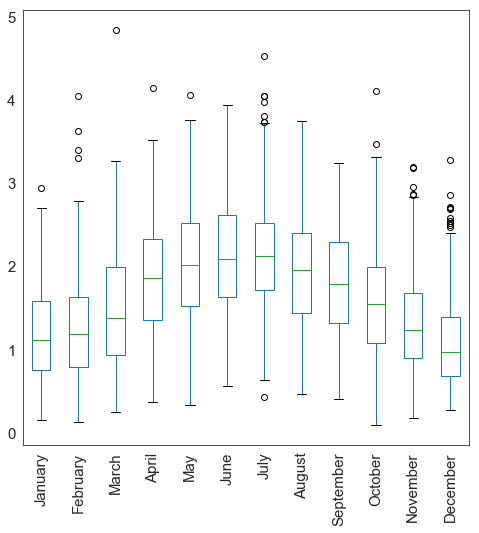

In [13]:
import seaborn as sns
sns.set_style("white")
df_1.boxplot(rot =90, grid=False, fontsize=15, figsize=(8,8))


In [27]:
print x1
print x2

1.16675776746
February    1.269111
dtype: float64


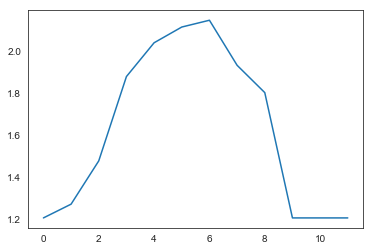

In [14]:
plt.plot(means)

## DIFFERENT METHOD TO CALCULATE MONTHLY AVERAGE WH
### Monthly averages for each year, 12 x 26 years (1993 -2018)

In [17]:
nameCSV = 'mel_wh_month_vs_year.csv'
no_nan = pd.read_csv(str(nameCSV))
no_nan

,January,February,March,April,May,June,July,August,September,October,November,December
0,1.368201,1.383426,1.267917,2.253172,2.444402,2.018851,1.839939,1.603995,1.841643,1.569902,1.322313,1.277822
1,1.011796,0.899443,1.543548,2.533557,2.208185,1.904742,2.318837,2.430231,1.568320,1.459072,1.287811,1.153464
2,1.136234,1.105322,1.865071,1.663754,1.918250,2.476039,1.809996,2.926374,1.918653,1.756760,1.239585,1.039379
3,0.961001,1.014672,1.512222,1.418839,1.765727,1.580858,1.283336,1.798997,1.561448,2.621101,1.046812,1.250066
4,1.579077,1.459462,1.770096,2.279410,1.684496,2.190344,2.550202,2.139416,1.577763,1.480485,1.348495,0.986396
5,1.389763,1.038424,1.650822,1.790735,2.245318,2.178571,2.554382,1.988026,2.126518,1.403311,1.319015,1.237717
6,1.219650,1.678441,1.481758,1.740728,2.050227,2.122686,2.309681,2.453001,1.992827,1.476700,1.392396,1.355352
7,0.887676,1.066722,1.394389,1.433507,2.341492,2.731321,1.889350,1.652964,1.831713,1.385594,1.157713,1.276849
8,1.129863,1.707939,0.828200,2.132755,1.499115,2.517330,1.949971,1.589229,1.764950,1.077732,1.343209,0.911040
9,1.066879,1.246458,1.594482,2.034615,1.973396,2.313011,1.915080,2.092077,1.666186,1.479754,1.752277,0.764988


In [28]:
y1= np.mean(no_nan['January'])
y2= np.mean(no_nan['February'])
y3= np.mean(no_nan['March'])
y4= np.mean(no_nan['April'])
y5= np.mean(no_nan['May'])
y6= np.mean(no_nan['June'])
y7= np.mean(no_nan['July'])
y8= np.mean(no_nan['August'])
y9= np.mean(no_nan['September'])
y10= np.mean(no_nan['October'])
y11= np.mean(no_nan['November'])
y12= np.mean(no_nan['December'])

In [29]:
print y1, 'January'
print y2, 'February'
print y3, 'March'
print y4, 'April'
print y5, 'May'
print y6, 'June'
print y7, 'July'
print y8, 'August'
print y9, 'September'
print y10, 'October'
print y11, 'November'
print y12, 'December'

1.16675776746 January
1.24802059969 February
1.49986274054 March
1.88460282212 April
2.03541541512 May
2.12878999635 June
2.13273228477 July
1.96420100415 August
1.80855239131 September
1.57029060273 October
1.35666031477 November
1.15216883308 December


In [61]:
allmonths = [y1,
y2,
y3,
y4,
y5,
y6,
y7,
y8,
y9,
y10,
y11,
y12]

print min(allmonths)
print max(allmonths)

1.15216883308
2.13273228477


In [70]:
DFJ = np.mean([y12,y1,y2])
MAM = np.mean([y3,y4,y5])
JJA = np.mean([y6,y7,y8])
SON = np.mean([y9,y10,y11])

In [73]:
print 'summer:',DFJ
print 'autumn:',MAM
print 'winter:',JJA
print 'spring:',SON


overallfake = np.mean([DFJ, MAM, JJA, SON])
print 'overall fake',overallfake

summer: 1.1889824000769231
autumn: 1.8066269925897434
winter: 2.0752410950897437
spring: 1.5785011029358975
overall fake 1.6623378976730767


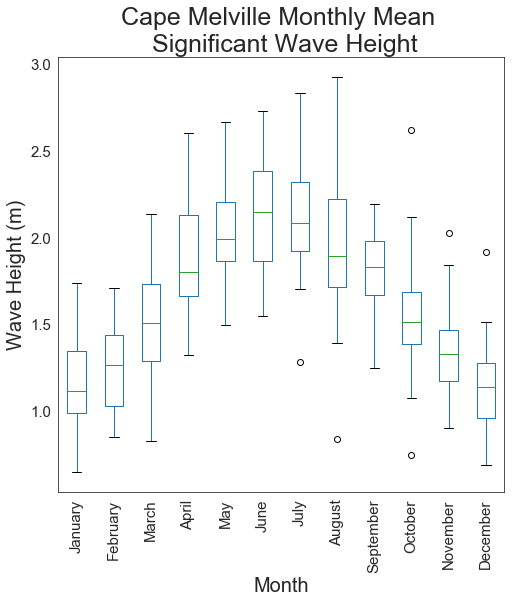

In [60]:
sns.set_style("white")
no_nan.boxplot(rot =90, grid=False, fontsize=15, figsize=(8,8))

plt.ylabel('Wave Height (m)', fontsize=(20))
plt.xlabel('Month', fontsize=(20))
plt.title('Cape Melville Monthly Mean \n Significant Wave Height', fontsize=(25))

plt.savefig('Melville Monthly Wh Boxplot - year vs month')